In [1]:
!pip install SpeechRecognition
!pip install matplotlib
!pip install librosa
!pip install pandas
!pip install tensorflow
!pip install transformers datasets evaluate seqeval
!pip install tf-keras
!pip install tensorflow[and-cuda]
!pip install ipywidgets --upgrade

In [2]:
import os
import librosa
import numpy as np
import json
import pandas as pd

In [3]:
# import speech_recognition as sr
# recognizer = sr.Recognizer()
# # input a file_path to a .wav file
# # returns the transcribed audio as a string
# # we can use BERT like in the homework to then tokenize/make into array and analyze it
# def getVectorOfWords(file_path):
#     with sr.AudioFile(file_path) as source:
#         audio = recognizer.record(source)
#     try:
#         # print("Transcription:", recognizer.recognize_google(audio))
#         return "" + recognizer.recognize_google(audio)
#     except sr.UnknownValueError:
#         return None

In [ ]:
# removes all files from images folder so subsequent runs don't have weird overlaps
# def clearImagesFolder():
#     print("Deleting all data from images folder")
#     directory = os.getcwd() + "/images"
#     for root, dirs, files in os.walk(directory, topdown=False):  # topdown=False to delete files before dirs
#         for file_name in files:
#             file_path = os.path.join(root, file_name)
#             if os.path.isfile(file_path) and file_name.endswith('.png'):
#                 os.remove(file_path)
#                 # print("" + file_path + " has been removed successfully")
#     print("All images removed successfully!")

In [ ]:
# import librosa.display
# import matplotlib.pyplot as plt
# # input a file_path to a .wav file
# # returns a png of the spectogram and a filepath to it
# def getSpectogram(file_path, emotion_label):
#     y, sr = librosa.load(file_path, sr=None) # load in the audio file and preserve its sample rate (replace with 16,000 if needed)
    
#     # Compute the spectrogram
#     D = librosa.stft(y)                        # Short-Time Fourier Transform
#     S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Convert to decibel scale

#     # Plot and save the spectrogram
#     fig = plt.figure(figsize=(6, 6))                # Set the figure size -- > num pixels will be 100 times this
#     # can change the cmap to "viridis" or "plasma" for different color themes
#     librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log", cmap="magma")  # Log frequency scale to mimic human audio perception

#     # TODO: at first try hiding as many extra features as possible and compare to when they're included
#     # plt.colorbar(format="%+2.0f dB")           # Add a colorbar
#     # plt.title("Spectrogram")
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Frequency (Hz)")
#     plt.tight_layout()
    
#     # Save the spectrogram as an image file
#     processed_path = (file_path.split("/")[-1]).split(".")[0]
#     output_image_path = f"./images/{emotion_label}/{processed_path}.png"  # TODO: figure out naming conventions for the file -- either use path or just have a counter that we pass in
#     plt.savefig(output_image_path, dpi=300)    # Save as PNG with high resolution
#     plt.close()                                # Close the figure to free memory
    
#     return output_image_path

In [ ]:
# def getTargetEmotionFromCSV(audio_file_name):
#     # parse audio_file_name to get distinguishing file info for CSV lookup
#     dialogueID, utteranceID = (audio_file_name.split(".wav")[0]).split('_')
#     dialogueID, utteranceID = int(dialogueID[3:]), int(utteranceID[3:])
#     csv = pd.read_csv('./train_sent_emo.csv')
#     # Filter the row(s) that satisfy both conditions
#     condition1 = (csv['Dialogue_ID'] == dialogueID)  # First column matches 'dialogueID'
#     condition2 = (csv['Utterance_ID'] == utteranceID)  # Second column matches 'utteranceID'
#     filtered_rows = csv[condition1 & condition2]
#     return filtered_rows['Emotion'].iloc[0]

In [ ]:
# def traverse_audio_files(directory="./train_splits_wav"):
#     # clearImagesFolder() # deletes everything from the image folder
#     data = []
    
#     # Traverse and process .wav files
#     print("Starting audio file traversal")
#     iterCount = 0
#     for file_name in os.listdir(directory):
#         # limit the number of loops so this doesn't take THAT long
#         if iterCount >= 3000:
#             break
#         file_path = os.path.join(directory, file_name)
        
#         if os.path.isfile(file_path) and file_name.endswith('.wav'):
#             transcription = getVectorOfWords(file_path)
#             # filter out the audio files that can't get a clear transcription
#             if not transcription:
#                 continue
#             emotion = getTargetEmotionFromCSV(file_name)
#             image_path = getSpectogram(file_path, emotion)
#             data.append({"Transcription": transcription, "Spectogram": image_path, "Emotion": emotion})
#         iterCount += 1
#     df = pd.DataFrame(data)
#     print("Finished creating dataframe and traversing audio files")
#     return df

In [ ]:
# df = traverse_audio_files()
# df.to_csv('data3000.csv', index=False)
# print(df)

In [22]:
df = pd.read_csv('data9000.csv')
emotion_labels = df['Emotion'].unique()
print(emotion_labels)
print(df)

# df = pd.read_csv('data_all_given_transcript.csv')
# emotion_labels = df['Emotion'].unique()
# print(emotion_labels)
# print(df)

['neutral' 'joy' 'fear' 'surprise' 'sadness' 'disgust' 'anger']
                                          Transcription  \
0                                                 Mrs M   
1                                     why did you write   
2                                 I heard what you said   
3                                            for a walk   
4     when did they made me head of purchasing thank...   
...                                                 ...   
3826  play Joey's lovable 2 but the thing about Joey...   
3827                                  what do you think   
3828                                         I guess so   
3829  so I'm just going to go back to talking to my ...   
3830                                               Ross   

                                 Spectogram   Emotion  
0      ./images9000/neutral/dia575_utt1.png   neutral  
1     ./images9000/neutral/dia689_utt12.png   neutral  
2      ./images9000/neutral/dia845_utt8.png   neutral  
3  

In [23]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.utils import load_img
def spec_augment(spectrogram, time_warp_param=10, freq_mask_param=15, time_mask_param=15):
    """Applies SpecAugment to a spectrogram.

    Args:
        spectrogram: The input spectrogram.
        time_warp_param: Maximum time shift for warping.
        freq_mask_param: Maximum frequency mask length.
        time_mask_param: Maximum time mask length.

    Returns:
        The augmented spectrogram.
    """

    augmented_spectrogram = spectrogram.copy()

    # Time warping
    time_shift = np.random.randint(-time_warp_param, time_warp_param + 1)
    augmented_spectrogram = np.roll(augmented_spectrogram, time_shift, axis=1)

    # Frequency masking
    num_freq_masks = np.random.randint(1, 3)
    for _ in range(num_freq_masks):
        freq_mask_length = np.random.randint(1, freq_mask_param + 1)
        freq_start = np.random.randint(0, augmented_spectrogram.shape[0] - freq_mask_length)
        augmented_spectrogram[freq_start:freq_start + freq_mask_length, :] = 0

    # Time masking
    num_time_masks = np.random.randint(1, 3)
    for _ in range(num_time_masks):
        time_mask_length = np.random.randint(1, time_mask_param + 1)
        time_start = np.random.randint(0, augmented_spectrogram.shape[1] - time_mask_length)
        augmented_spectrogram[:, time_start:time_start + time_mask_length] = 0

    return augmented_spectrogram

def augment_emotion(emotion, df):
    newDf = df.copy()
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    value_counts = df['Emotion'].value_counts()
    frequency = value_counts.get(emotion, 0)  # Handle non-existent value
    frequency = math.ceil(frequency*0.25)
    mx = 0
    for index, row in df.iterrows():
        if mx == frequency:
            break 
        spectrogram_path = row['Spectogram']
        curr_emotion = row['Emotion']
        text = row['Transcription']
        path_arr = spectrogram_path.split("/")
        if len(path_arr) < 4:
            print(f"Invalid path format: {spectrogram_path}")
            continue  # Skip this row if the path is invalid
        file_name = path_arr[3]
        emotion_folder = path_arr[2]
        folder = path_arr[1]
        if curr_emotion == emotion:
            mx += 1 

            img = load_img(spectrogram_path)
            spectrogram = np.array(img)
            augmented_spectrogram = spec_augment(spectrogram)
            path = "./"  + "images9000" + "/" + emotion_folder + "/" + file_name.split(".")[0] + "augmented.png"
            plt.imsave(path, augmented_spectrogram, cmap='gray')
            newDf.loc[len(newDf)] = [text, path, emotion]
    # newDf.to_csv('datatest2.csv',index=False)
    return newDf        



# augment_emotion("anger", df)

In [24]:
##### prepreocessing
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import keras.callbacks
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from transformers import DistilBertTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


### balance dataset
balance = True
if balance:
    # augment the data
    emotion_counts = df['Emotion'].value_counts()
    lowest_emotions = emotion_counts.nsmallest(2).index.tolist()
    for emotion in lowest_emotions:
        df = augment_emotion(emotion, df)
    
    # reduce the data
    neutral_class = 0  # Replace this with the actual index for "neutral" in factorized labels
    neutral_data = df[df['Emotion'] == "neutral"]
    non_neutral_data = df[df['Emotion'] != "neutral"]
    # Undersample the "neutral" class
    neutral_downsampled = resample(
        neutral_data,
        replace=False,  # Don't sample with replacement
        n_samples= int(df['Emotion'].value_counts().mean()),  # scale dwon the size
        random_state=42
    )
    
    # Combine undersampled "neutral" with other classes
    balanced_df = pd.concat([neutral_downsampled, non_neutral_data])
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training

    texts = list(balanced_df['Transcription'])
    image_paths = list(balanced_df['Spectogram'])
    labels = pd.factorize(balanced_df['Emotion'])[0] # Re-factorize the labels after balancing
else:
    df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training
    texts = list(df['Transcription'])
    image_paths = list(df['Spectogram'])
    labels = pd.factorize(df['Emotion'])[0]  # Convert categorical to integers
### prep for BERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt") # Tokenize transcriptions
input_ids = tokens['input_ids'].numpy()  # Convert to NumPy array
attention_masks = tokens['attention_mask'].numpy()

### prep for CNN
images = []

for path in image_paths:
    # Load image
    img = load_img(path, target_size=(128, 128))  # Resize to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    images.append(img_array)

images = np.array(images)  # Shape: (batch_size, 128, 128, 3)
### split the data
# Step 1: Split data into training + validation and test sets
x_images_trainval, x_images_test, x_text_trainval, x_text_test, x_attention_trainval, x_attention_test, y_trainval, y_test = train_test_split(
    images, input_ids, attention_masks, labels, test_size=0.15, random_state=42, stratify=labels
)
# Step 2: Further split training + validation into training and validation sets
x_images_train, x_images_val, x_text_train, x_text_val, x_attention_train, x_attention_val, y_train, y_val = train_test_split(
    x_images_trainval, x_text_trainval, x_attention_trainval, y_trainval, test_size=0.15, random_state=42, stratify=y_trainval
)

In [25]:
if balance:
    print("balanced\n", balanced_df['Emotion'].value_counts(), "\n") # balanced distribution
print("original\n", df['Emotion'].value_counts())  # Original distribution

balanced
 Emotion
joy         610
neutral     554
anger       418
surprise    406
sadness     324
fear        123
disgust     118
Name: count, dtype: int64 

original
 Emotion
neutral     1881
joy          610
anger        418
surprise     406
sadness      324
fear         123
disgust      118
Name: count, dtype: int64


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from transformers import TFDistilBertModel

# BERT Model Wrapper
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.bert = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
    
    def call(self, inputs, training=False):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, training=training)
        return outputs.last_hidden_state[:, 0, :]  # CLS token embedding

# BERT Branch
text_input = layers.Input(shape=(46,), dtype='int32', name='text_input')  # Adjust shape accordingly
attention_input = layers.Input(shape=(46,), dtype='int32', name='attention_input')
bert_output = BertLayer()([text_input, attention_input])
bert_dense = layers.Dense(128, activation='relu')(bert_output)

I0000 00:00:1733757919.238878 4120191 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:18:00.0, compute capability: 7.0
I0000 00:00:1733757919.239390 4120191 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14784 MB memory:  -> device: 1, name: Tesla V100-SXM2-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTor

In [27]:
# make array for cnn_models
cnn_models = []

In [28]:
# CNN Branch -- model 8
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model8 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model8.summary())

cnn_models.append(("model8", model8))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 57600)     │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │  7,372,928 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     16,448 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        650 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,507,850 (28.64 MB)

 Trainable params: 7,507,850 (28.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
# CNN Branch -- model 10
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model10 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model10.summary())

cnn_models.append(("model10", model10))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 63, 63,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 30, 30,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │     36,928 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12544)     │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 12544)     │          0 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │  1,605,760 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │     16,448 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 10)        │        650 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,777,610 (6.78 MB)

 Trainable params: 1,777,610 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
# CNN Branch -- model 12
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model12 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model12.summary())

cnn_models.append(("model12", model12))

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 63, 63,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 30, 30,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │     36,928 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 14, 14,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 12, 12,    │     36,928 │ max_pooling2d_7[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 6, 6, 64)  │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2304)      │          0 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2304)      │          0 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │    295,040 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │     16,448 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 503,818 (1.92 MB)

 Trainable params: 503,818 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
# CNN Branch -- model 13
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model13 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model13.summary())

cnn_models.append(("model13", model13))

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 63, 63,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 30, 30,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 30, 30,    │          0 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 28, 28,    │     36,928 │ dropout_3[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 14, 14,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_11… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 6, 6, 64)  │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2304)      │          0 │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2304)      │          0 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │    295,040 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 256)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_10[0][0]  

 Total params: 503,818 (1.92 MB)

 Trainable params: 503,818 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
# CNN Branch -- model 15
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model15 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model15.summary())

cnn_models.append(("model15", model15))

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 63, 63,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 30, 30,    │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_14… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 14, 14,    │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 6, 6, 64)  │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 6, 6, 128) │      8,320 │ max_pooling2d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 4, 4, 64)  │     73,792 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 2, 2, 64)  │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 256)       │          0 │ max_pooling2d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 323,786 (1.24 MB)

 Trainable params: 323,786 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
##### train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Metric to monitor (e.g., validation loss)
    patience=5,            # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the best weights once training stops
)

histories = []
valid_maxes = []
for label, model in cnn_models:
    print(label)
    # Train the model
    history = model.fit(
        x={'text_input': x_text_train, 'attention_input': x_attention_train, 'image_input': x_images_train},
        y=y_train,
        batch_size=32,
        epochs=50,
        validation_data=(
            {'text_input': x_text_val, 'attention_input': x_attention_val, 'image_input': x_images_val},
            y_val
        ),
        callbacks=[early_stopping]
    )
    histories.append((label, history))
    num_layers = int(label.split("l")[1])
    valid_maxes.append((num_layers, max(history.history['val_accuracy']) * 100))
    print("Best validation accuracy percentage:", max(history.history['val_accuracy']) * 100, "%\n")

model8
Epoch 1/50


I0000 00:00:1733757930.990345 4122872 service.cc:148] XLA service 0x1503a8002bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733757930.993401 4122872 service.cc:156]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
I0000 00:00:1733757930.993428 4122872 service.cc:156]   StreamExecutor device (1): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-12-09 10:25:31.389455: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
W0000 00:00:1733757931.444126 4122872 assert_op.cc:38] Ignoring Assert operator functional_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:25:31.526678: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:61] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if repro

 7/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1925 - loss: 2.7437 

I0000 00:00:1733757938.776162 4122872 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2354 - loss: 2.2344

W0000 00:00:1733757940.104207 4122871 assert_op.cc:38] Ignoring Assert operator functional_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:25:41.218824: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-09 10:25:41.247057: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,61,61]{3,2,1,0}, u8[0]{0}) custom-call(f32[

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2362 - loss: 2.2218

W0000 00:00:1733757946.037701 4122870 assert_op.cc:38] Ignoring Assert operator functional_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:25:46.450700: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-09 10:25:46.488366: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,61,61]{3,2,1,0}, u8[0]{0}) custom-call(f32[

58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.2364 - loss: 2.2178 - val_accuracy: 0.2393 - val_loss: 1.8195
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2742 - loss: 1.7669 - val_accuracy: 0.2883 - val_loss: 1.7555
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3309 - loss: 1.6999 - val_accuracy: 0.3221 - val_loss: 1.7085
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3550 - loss: 1.6661 - val_accuracy: 0.3405 - val_loss: 1.7095
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3718 - loss: 1.5960 - val_accuracy: 0.3589 - val_loss: 1.6824
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3927 - loss: 1.5859 - val_accuracy: 0.3620 - val_loss: 1.7059
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3987 - loss: 1.5592 - val_accuracy: 0.3344 - val_loss: 1.6693
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4607 - loss: 1.4373 - val_accuracy: 0.3681 - val_loss: 

W0000 00:00:1733757969.978582 4122870 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:11.397217: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,30,30]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2338 - loss: 1.9647

W0000 00:00:1733757976.914797 4122869 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:18.025129: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,64,30,30]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2362 - loss: 1.9580

W0000 00:00:1733757982.808009 4122871 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:23.180475: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,30,30]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
W0000 00:00:1733757984.122674 4122874 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:24.371802: I external/lo

58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.2369 - loss: 1.9559 - val_accuracy: 0.3252 - val_loss: 1.7241
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3388 - loss: 1.6862 - val_accuracy: 0.3405 - val_loss: 1.7080
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3860 - loss: 1.6137 - val_accuracy: 0.3466 - val_loss: 1.7038
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4000 - loss: 1.6101 - val_accuracy: 0.3497 - val_loss: 1.7276
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4046 - loss: 1.5649 - val_accuracy: 0.3067 - val_loss: 1.7680
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4064 - loss: 1.5485 - val_accuracy: 0.3067 - val_loss: 1.7345
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4046 - loss: 1.5513 - val_accuracy: 0.3067 - val_loss: 1.8126
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3972 - loss: 1.5505 - val_accuracy: 0.3436 - val_loss: 

W0000 00:00:1733758001.734378 4122874 assert_op.cc:38] Ignoring Assert operator functional_2_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:43.171713: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,14,14]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2383 - loss: 2.0001

W0000 00:00:1733758008.754530 4122873 assert_op.cc:38] Ignoring Assert operator functional_2_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:49.914609: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,64,14,14]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2406 - loss: 1.9913

W0000 00:00:1733758014.597220 4122873 assert_op.cc:38] Ignoring Assert operator functional_2_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:54.967477: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,14,14]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
W0000 00:00:1733758015.920901 4122869 assert_op.cc:38] Ignoring Assert operator functional_2_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:26:56.183306: I external/lo

58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.2414 - loss: 1.9886 - val_accuracy: 0.2883 - val_loss: 1.7407
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3754 - loss: 1.6532 - val_accuracy: 0.3466 - val_loss: 1.7194
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4057 - loss: 1.5810 - val_accuracy: 0.3344 - val_loss: 1.6846
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4032 - loss: 1.5679 - val_accuracy: 0.3589 - val_loss: 1.6924
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4017 - loss: 1.5544 - val_accuracy: 0.3497 - val_loss: 1.6811
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3933 - loss: 1.5227 - val_accuracy: 0.3650 - val_loss: 1.6787
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4406 - loss: 1.4885 - val_accuracy: 0.3282 - val_loss: 1.7274
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4113 - loss: 1.5063 - val_accuracy: 0.3344 - val_loss: 

W0000 00:00:1733758041.271216 4122871 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2482 - loss: 1.9915

W0000 00:00:1733758048.934693 4122869 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2506 - loss: 1.9825

W0000 00:00:1733758055.102214 4122869 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
W0000 00:00:1733758056.253405 4122870 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.2514 - loss: 1.9797 - val_accuracy: 0.3436 - val_loss: 1.7392
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3900 - loss: 1.6083 - val_accuracy: 0.3528 - val_loss: 1.6916
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4092 - loss: 1.5484 - val_accuracy: 0.3466 - val_loss: 1.7229
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4042 - loss: 1.5448 - val_accuracy: 0.3528 - val_loss: 1.7302
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4217 - loss: 1.4931 - val_accuracy: 0.3589 - val_loss: 1.6897
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4174 - loss: 1.4981 - val_accuracy: 0.3558 - val_loss: 1.7195
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4211 - loss: 1.4842 - val_accuracy: 0.3221 - val_loss: 1.7654
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4355 - loss: 1.4925 - val_accuracy: 0.3742 - val_loss: 

W0000 00:00:1733758079.201440 4122875 assert_op.cc:38] Ignoring Assert operator functional_4_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:28:00.697627: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,6,6]{3,2,1,0}, f32[64,128,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2384 - loss: 1.9761

W0000 00:00:1733758086.325912 4122873 assert_op.cc:38] Ignoring Assert operator functional_4_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:28:07.538058: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,128,6,6]{3,2,1,0}, f32[64,128,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.2416 - loss: 1.9668

W0000 00:00:1733758092.442914 4122872 assert_op.cc:38] Ignoring Assert operator functional_4_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:28:12.849864: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,6,6]{3,2,1,0}, f32[64,128,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
W0000 00:00:1733758093.892754 4122871 assert_op.cc:38] Ignoring Assert operator functional_4_1/bert_layer_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
2024-12-09 10:28:14.167690: I external/loca

58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.2426 - loss: 1.9638 - val_accuracy: 0.3558 - val_loss: 1.7213
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3987 - loss: 1.5809 - val_accuracy: 0.3712 - val_loss: 1.7410
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4239 - loss: 1.5155 - val_accuracy: 0.3313 - val_loss: 1.7067
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4487 - loss: 1.4647 - val_accuracy: 0.3742 - val_loss: 1.7076
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4493 - loss: 1.4670 - val_accuracy: 0.3558 - val_loss: 1.7140
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4094 - loss: 1.4784 - val_accuracy: 0.3466 - val_loss: 1.7151
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4452 - loss: 1.4454 - val_accuracy: 0.3528 - val_loss: 1.7415
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4588 - loss: 1.4281 - val_accuracy: 0.3313 - val_loss: 

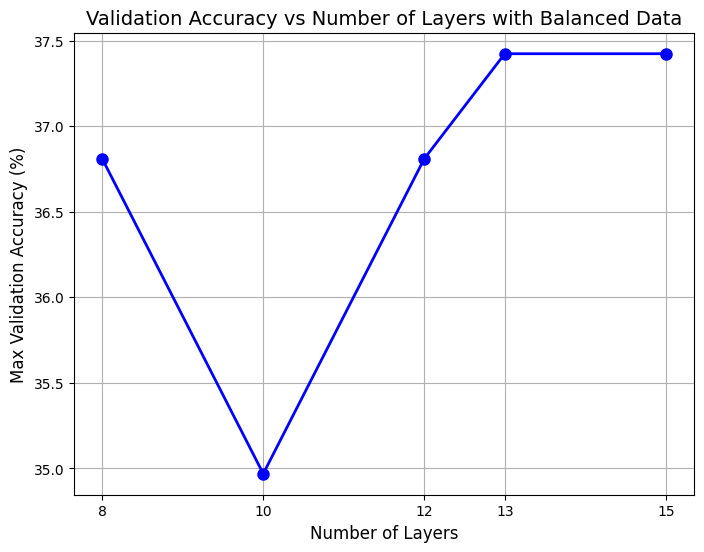

In [34]:
### graph models and their max validation accuracies
# Extract the number of layers and corresponding validation accuracies
num_layers = [x[0] for x in valid_maxes]
val_accuracies = [x[1] for x in valid_maxes]

# Plotting the trend
plt.figure(figsize=(8, 6))
plt.plot(num_layers, val_accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add titles and labels
plt.xlabel('Number of Layers', fontsize=12)
plt.ylabel('Max Validation Accuracy (%)', fontsize=12)

# Show grid and plot
plt.grid(True)
plt.xticks(num_layers)  # To ensure each x-tick is labeled
if balance:
    plt.title('Validation Accuracy vs Number of Layers with Balanced Data', fontsize=14)
    plt.savefig('./plots/numlayers_vs_val_acc_balanced', dpi=300)
else:
    plt.title('Validation Accuracy vs Number of Layers with Unbalanced Data', fontsize=14)
    plt.savefig('./plots/numlayers_vs_val_acc_unbalanced', dpi=300)
plt.show()

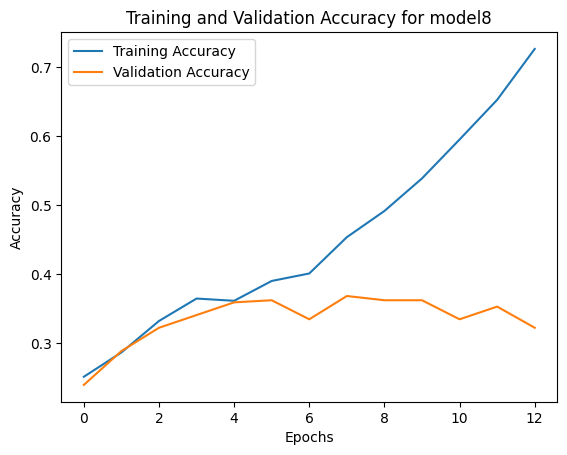

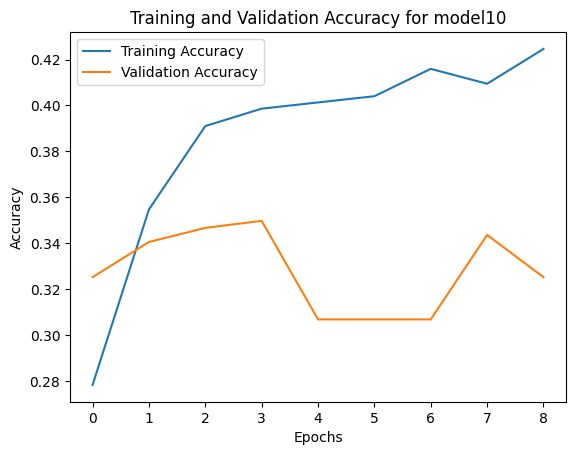

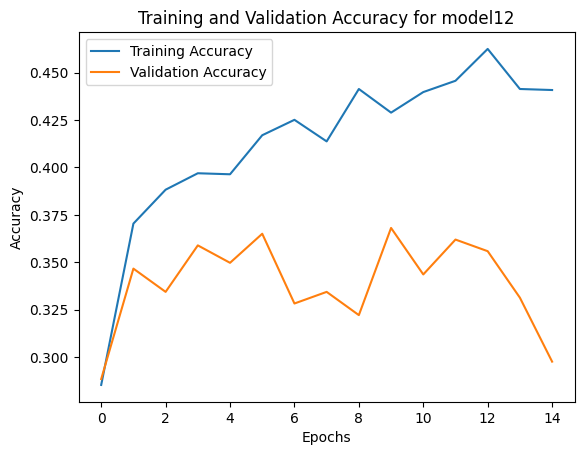

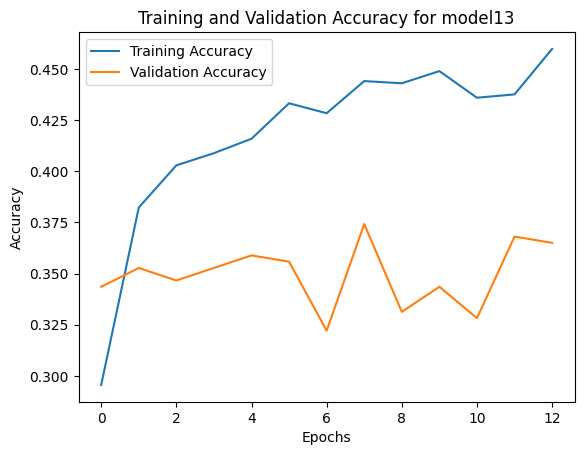

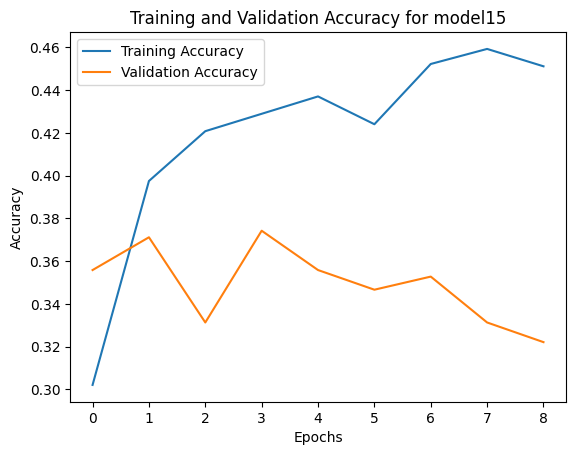

In [35]:
### graphs
import matplotlib.pyplot as plt
# Plot training vs. validation accuracy
for name, history in histories:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('./plots/train_vs_val_acc', dpi=300)
    plt.show()

model8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.3081
F1 Score (Weighted): 0.2763
F1 Score for anger: 0.3791
F1 Score for disgust: 0.3574
F1 Score for fear: 0.2059
F1 Score for joy: 0.3115
F1 Score for neutral: 0.1053
F1 Score for sadness: 0.1935
F1 Score for surprise: 0.0000
model10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.2533
F1 Score (Weighted): 0.2591
F1 Score for anger: 0.1443
F1 Score for disgust: 0.3546
F1 Score for fear: 0.2029
F1 Score for joy: 0.3937
F1 Score for neutral: 0.1053
F1 Score for sadness: 0.2169
F1 Score for surprise: 0.0000
model12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.2898
F1 Score (Weighted): 0.2719
F1 Score for anger: 0.2162
F1 Score for disgust: 0.1263
F1 Score for fear: 0.4167
F1 Score for joy: 0.4595
F1 Score for neutral: 0.0000
F1 Score for sadness: 0.1975
F1 Score for surprise: 0.1739
model13
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.3055
F1 Score (Weighted): 0.2531
F1 Score for anger: 0.2435
F1 Score for disg

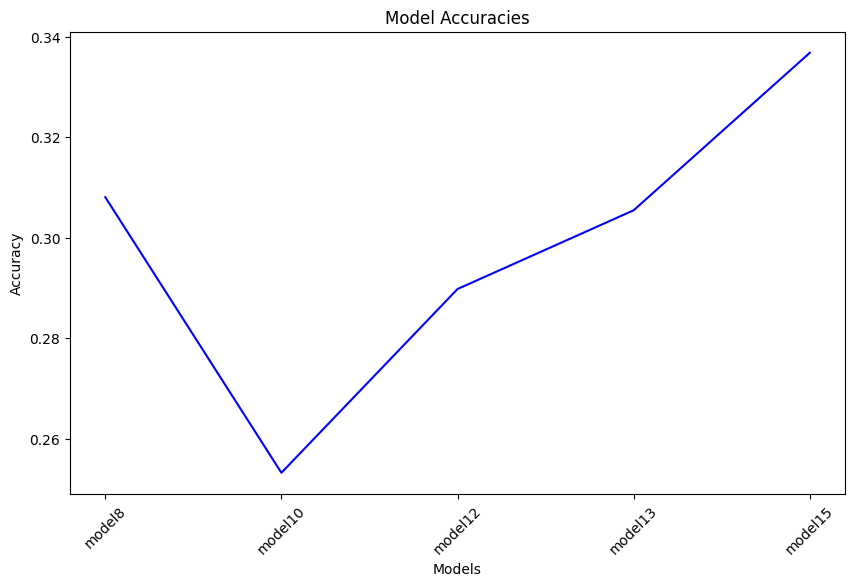

In [44]:
from sklearn.metrics import accuracy_score, f1_score

# Example emotion labels
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# To store accuracies for each model
model_accuracies = []

predictions = []
# Predict on the test data
for name, model in cnn_models:
    print(name)
    y_pred = model.predict({
        'text_input': x_text_test, 
        'attention_input': x_attention_test, 
        'image_input': x_images_test
    })
    y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax outputs to class predictions
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    model_accuracies.append((name, accuracy))  # Store accuracy for plotting
    
    # Weighted F1 Score
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    print(f"F1 Score (Weighted): {f1:.4f}")
    
    # F1 Score per class
    f1_per_class = f1_score(y_test, y_pred_classes, average=None)
    for idx, label in enumerate(emotion_labels):
        print(f"F1 Score for {label}: {f1_per_class[idx]:.4f}")
    
    # Append predictions for class distribution plotting
    predictions.append((name, y_pred_classes))

# Plot accuracy for each model
model_names = [name for name, _ in model_accuracies]
accuracies = [accuracy for _, accuracy in model_accuracies]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, color='blue')
plt.title('Model vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

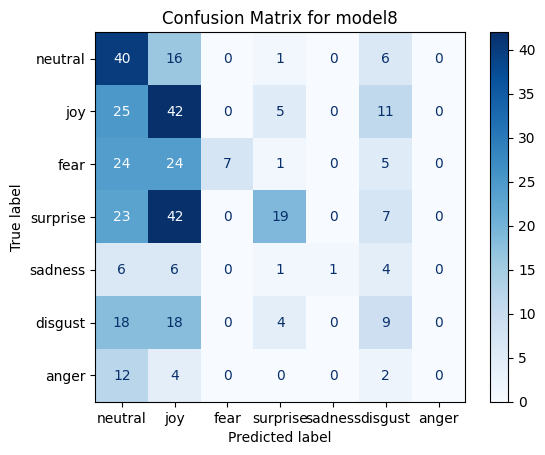

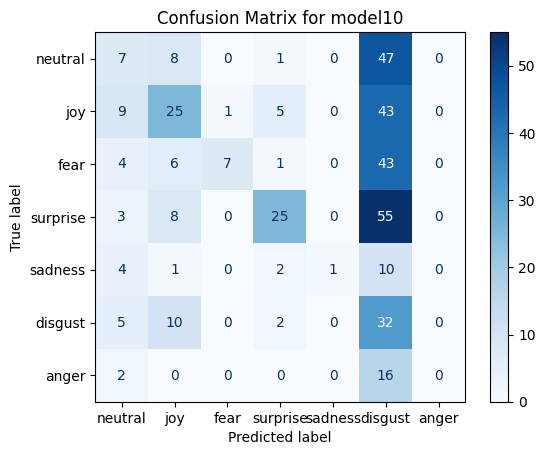

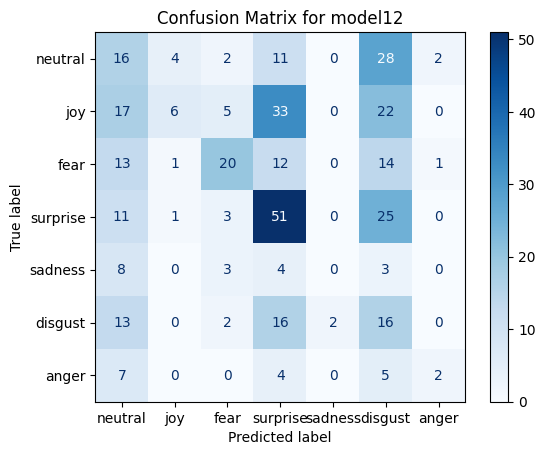

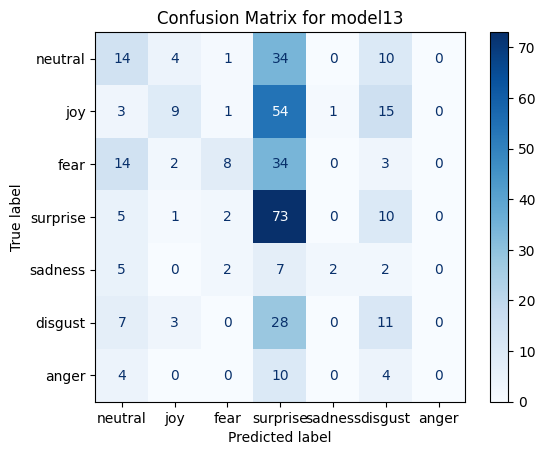

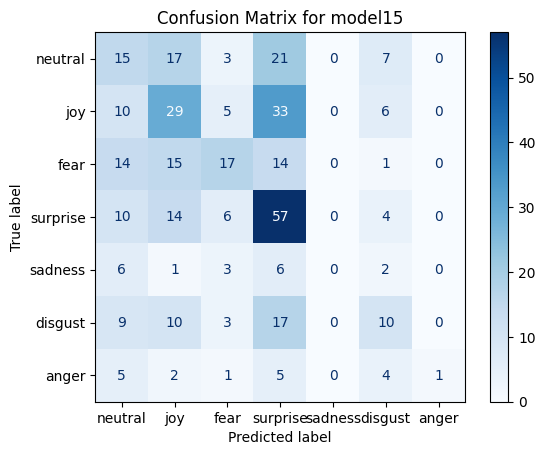

In [37]:
## could either move this into the for loop above or save the y_pred_classes in an array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, pred_classes in predictions:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred_classes)
    
    # Plot confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    # plt.savefig('./plots/confusion_matrix', dpi=300)
    plt.show()


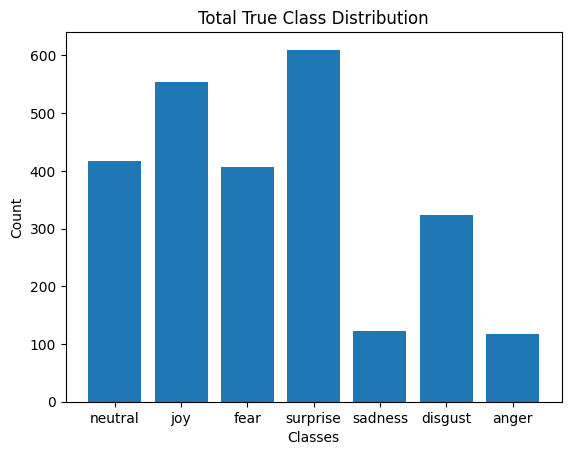

In [38]:
# Combine the true labels from the training, validation, and test sets
y_all_classes = np.concatenate([y_train, y_val, y_test])

# Plot class distribution of all labels
unique, counts = np.unique(y_all_classes, return_counts=True)
plt.bar(unique, counts, tick_label=emotion_labels)  # Use emotion_labels to label your classes
plt.title('Total True Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.savefig('./plots/total_true_class_distribution', dpi=300)
plt.show()


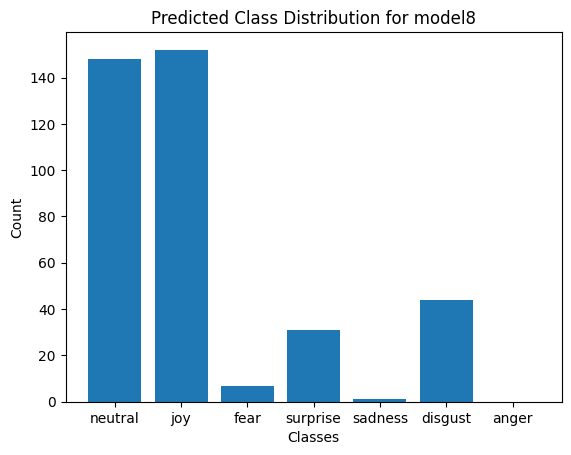

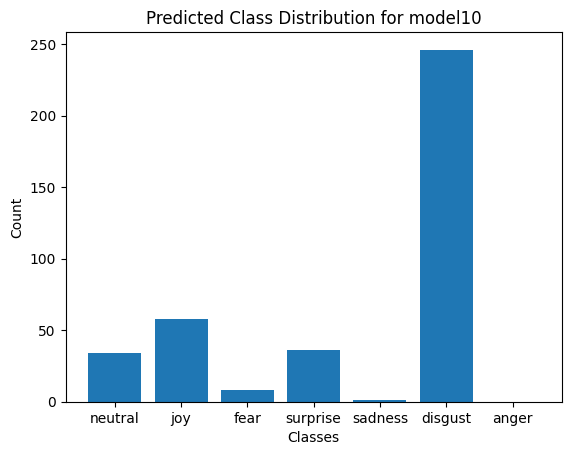

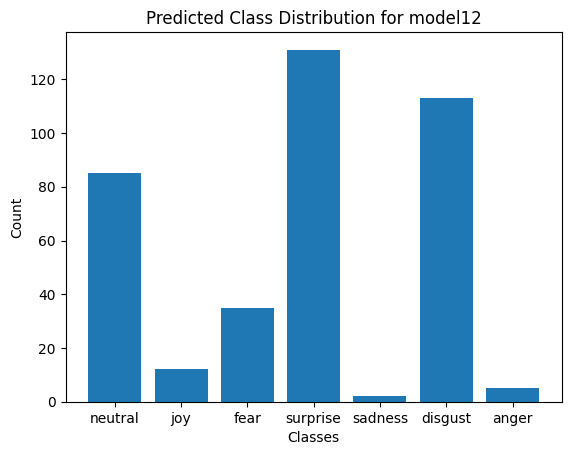

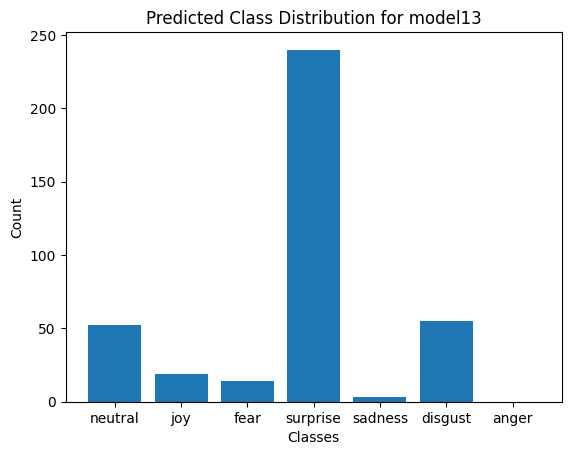

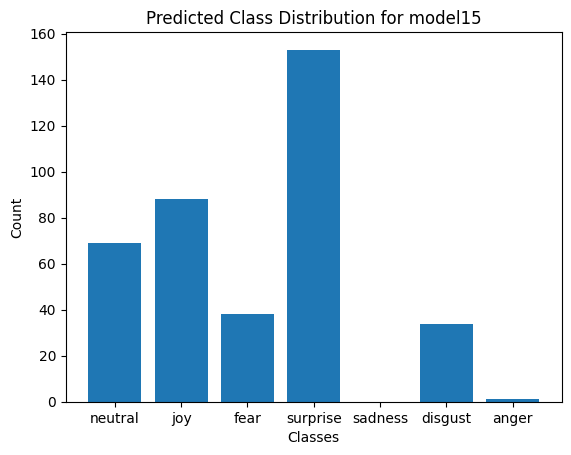

In [40]:
for name, pred_classes in predictions:
    # Initialize counts for all emotion classes
    counts = np.zeros(len(emotion_labels), dtype=int)
    
    # Get unique class counts from predictions
    unique, unique_counts = np.unique(pred_classes, return_counts=True)
    
    # Update counts for the unique classes
    for u, count in zip(unique, unique_counts):
        counts[u] = count
    
    # Plot the class distribution
    plt.bar(range(len(emotion_labels)), counts, tick_label=emotion_labels)
    plt.title(f'Predicted Class Distribution for {name}')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()
